# Lambda

Non-linear redshift-space distortions induced large-scale velocity field

## lambdalib library

This is a Python library useful for using the data in this repository

Before importing the library, the `lambdalib` directory needs to be in the search path for Python modules,

```bash
export PYTHONPATH=/Users/junkoda/Research/lambda/lib
```

in shell, or

```python
import sys
sys.path.append('/Users/junkoda/Research/lambda/lib')
```

in Python.

In [1]:
# Always run this section to import necessary modules
import matplotlib.pyplot as plt
import numpy as np

# Add a search path that incldues lambdalib (if necessary)
# import os
# import sys
# sys.path.append(os.getcwd() + '/../lib')
import lambdalib

## Available simulations

- nbody (low resolution N-body particles)
- wizcola (N-body haloes, Gadget2 simulation not approximate simulation COLA)
- wizcola particles (N-body particle subsample)

### snapshot infomation

* redshift
* a: scale factor
* H: Hubble parameter $\mathrm{km} \,\mathrm{s}^{-1} / h^{-1} \mathrm{Mpc}$
* D: linear growth factor
* f: linear growth rate


In [2]:
sims = lambdalib.info()
print('Available simulations:', sims)

# simulation parameters
d = lambdalib.info('wizcola')
print('boxsize:', d['boxsize'])
print('omega_m:', d['omega_m'])

# snapshot information
d = lambdalib.info('wizcola', '006')
print(d)


Project directory:  <function lambda_dir at 0x10d747620>
Data directory:  /Users/junkoda/Research/lambda/github/data
Available simulations: ['nc512_1000', 'wizcola', 'wizcola_particles']
boxsize: 600
omega_m: 0.273
{'redshift': 1.0, 'a': 0.5, 'H': 170.6165290937546, 'D': 0.6216539154571157, 'f': 0.8544124093026595}


## Lambda plot

```
lambdalib.load_lambda(sim, isnp, n='summary')
```

This function loads decomposed power spectrum as a function of lambda,

$$
P_{DD}(k, \mu; \lambda), P_{DU}(k, \mu; \lambda), P_{UU}(k, \mu; \lambda)
$$

$$
\lambda = f/f_{true}
$$

It returns a dictionary with:

`PDD[ik, imu, ilambda]`, `PDU[ik, imu, ilambda]`, `PUU[ik, imu, ilambda]`

Decomposed power $P_{**}(k, \mu; \lambda)$, mean of n realisations

`dPDD[ik, imu, ilambda]`, `dPDU[ik, imu, ilambda]`, `dPUU[ik, imu, ilambda]`

Standard error in the mean of n resalisations

`nrealisations`: number of realisations

`lambdas[ilambda]`: $\lambda$

`k[ik]`: $k \quad [h \mathrm{Mpc}^{-1}]$

`mu[ik]`: $\mu$

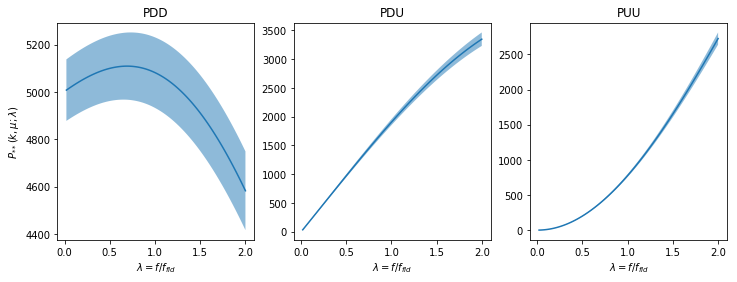

redshift =  0
k = 0.10586368 h/Mpc
mu = 0.94918305


In [3]:
#
# Plots decomposed power as a function of lambda
#
d = lambdalib.load_lambda('wizcola', '010')

def plot(x, y, dy, **kwargs):
    plt.xlabel('$\lambda = f/f_{fid}$')
    plt.fill_between(x, y-dy, y+dy, alpha=0.5, **kwargs)
    plt.plot(x, y, **kwargs)


# Speficty k and mu indecies
# The value of k and mu are in d['k'] and d['mu'], respectively.
ik = 10
imu = 9

k = d['k'][ik, imu]
mu = d['mu'][ik, imu]
lambdas = d['lambda']

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('PDD')
plt.ylabel('$P_{**}(k, \mu; \lambda)$')
plot(lambdas, d['PDD'][ik, imu, :], d['dPDD'][ik, imu, :])

plt.subplot(1, 3, 2)
plt.title('PDU')
plot(lambdas, d['PDU'][ik, imu, :], d['dPDU'][ik, imu, :])

plt.subplot(1, 3, 3)
plt.title('PUU')
plot(lambdas, d['PUU'][ik, imu, :], d['dPUU'][ik, imu, :])
plt.show()

print('redshift = ', d['redshift'])
print('k =', k, 'h/Mpc')
print('mu =', mu)


## Fit lambda plot

Using `fit_lamda`, you can fit the lambda plot with a fitting function $f$

$$
P_{DD}(k, \mu; \lambda) = P_{DD}(k, \mu, \lambda = 0) \times f(\lambda)
$$

$$
P_{DU}(k, \mu; \lambda) = \mathcal{A}\lambda \times f(\lambda)
$$

$$
P_{UU}(k, \mu; \lambda) = \mathcal{A}\lambda^2 \times f(\lambda)
$$

where $\mathcal{A}$ is a fitting parameter.

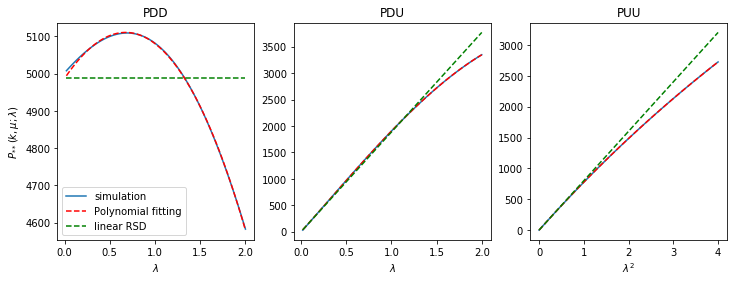

PDD a1, a2, ... =  [ 0.07235723 -0.05172622 -0.00140681 -0.00051143]
PDU a1, a2, ... =  [ 0.11163548 -0.1311613   0.03462927 -0.00548051]
PUU a1, a2, ... =  [ 0.05263683 -0.1108143   0.03267184 -0.00454006]


In [4]:
#
# Fit lambda plot with a polynomial
#
d = lambdalib.load_lambda('wizcola', '010')

ik = 10
imu = 9

def f(x, a1, a2, a3, a4):
    return 1 + a1*x + a2*x**2 + a3*x**3 + a4*x**4

fit = lambdalib.fit_lambda(d, ik, imu, f)

x = d['lambda']

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('PDD')
plt.xlabel('$\\lambda$')
plt.ylabel('$P_{**}(k, \mu; \lambda)$')

plt.plot(x, d['PDD'][ik, imu, :], label='simulation')
plt.plot(x, fit['PDD'], '--', color='red', label='Polynomial fitting')
plt.plot(x, d['PDD0'][ik, imu]*np.ones_like(x), '--', color='green', label='linear RSD')
plt.legend()

plt.subplot(1, 3, 2)
plt.title('PDU')
plt.xlabel('$\\lambda$')

plt.plot(x, d['PDU'][ik, imu, :], label='simulation')
plt.plot(x, fit['PDU'], '--', color='red', label='Polynomial fitting')
plt.plot(x, fit['PDU_amp']*x, '--', color='green', label='linear RSD')

plt.subplot(1, 3, 3)
plt.title('PUU')
plt.xlabel('$\\lambda^2$')

plt.plot(x**2, d['PUU'][ik, imu, :], label='simulation')

plt.plot(x**2, fit['PUU'], '--', color='red', label='Polynomial fitting')
plt.plot(x**2, fit['PUU_amp']*x**2, '--', color='green', label='linear RSD')

plt.show()

print('PDD a1, a2, ... = ', fit['PDD_params'])
print('PDU a1, a2, ... = ', fit['PDU_params'])
print('PUU a1, a2, ... = ', fit['PUU_params'])


## Real-space power spectra

* Linear power spectrum (redshift = 0)
* matter power spectrum
* halo power spectrum
* velocity divergence power spectrum $P_{\delta\delta}, fP_{\delta\theta}, f^2P_{\theta\theta}$

`k`: wave number `k[ik]` [$ h / \mathrm{Mpc} $]

`P`: power spectrum, `P[ik, icol, irealisation]`

|icol|   |
|---|:----|
|0  | $k$  |
|1  | number of modes  |
|2  | $P_{\delta\delta}$  |
|3  | $f P_{\delta\theta}$  |
|4  | $f^2 P_{\theta\theta}$  |



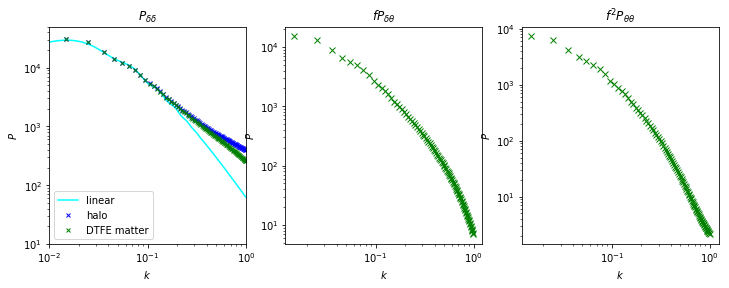

In [11]:
linear = lambdalib.load_linear_power('wizcola')
halo = lambdalib.load_matter_power('wizcola', '010')
theta = lambdalib.load_theta_power('wizcola_particles', '010')

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('$P_{\\delta\\delta}$')
plt.xlabel('$k$')
plt.ylabel('$P$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01, 1.0)
plt.ylim(10, 5.0e4)

plt.plot(linear['k'], linear['P'], color='cyan', label='linear')
plt.plot(halo['k'], halo['summary']['P'], 'x', color='blue', markersize=4, label='halo')
plt.plot(theta['k'], theta['summary']['Pdd'], 'x', color='green', markersize=4, label='DTFE matter')

plt.legend()

# delta - theta
# (aHf) P_delta_theta
plt.subplot(1, 3, 2)
plt.title('$f P_{\\delta\\theta}$')
plt.xlabel('$k$')
plt.ylabel('$P$')
plt.xscale('log')
plt.yscale('log')

plt.plot(theta['k'], theta['summary']['Pdt'], 'x', color='green', label='DTFE matter')

# delta - theta
# f^2 P_theta_theta
plt.subplot(1, 3, 3)
plt.title('$f^2 P_{\\theta\\theta}$')
plt.xlabel('$k$')
plt.ylabel('$P$')
plt.xscale('log')
plt.yscale('log')

plt.plot(theta['k'], theta['summary']['Ptt'], 'x', color='green', label='DTFE matter')

plt.show()


## TNS model

Theoretical TNS AB terms (SPT)

```python
sim = 'wizcola'
taruya = lambdalib.TaruyaModel(sim)
```

$$
A(k, \mu) = \sum_{m,n=1}^3 f^n \mu^{2m} A_{mn}(k)
$$

$$
B(k, \mu) = \sum_{n=1}^4 \sum_{a,b=1}^2 (-f)^{a+b} \mu^{2n} B^n_{ab}(k)
$$

|attribute|   |
|---|---|
|k  |wavenumber|
|A11| $A_{mn}(k)$ |
|A12| |
|A22| |
|A23| |
|A33| |
|B111| $B^n_{ab}(k)$|
|B211| |
|B112| $B^1_{12} + B^1_{21}$|
|B212| $B^2_{12} + B^2_{21}$|
|B312| $B^3_{12} + B^3_{21}$|
|B122| |
|B222| |
|B322| |
|B422| |





mu = 0.95


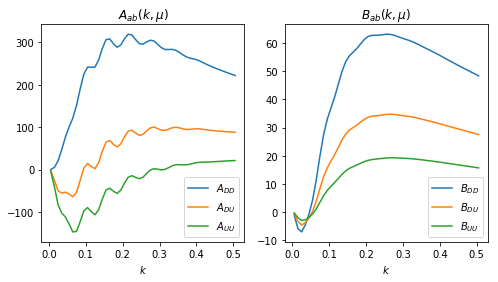

In [27]:
taruya = lambdalib.TaruyaModel('wizcola')
isnp = '006'
mu = 0.95

print('mu = %.2f' % mu)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('$A_{ab}(k, \\mu)$')
plt.xlabel('$k$')
plt.plot(taruya.k, taruya.ADD(isnp, mu), label='$A_{DD}$')
plt.plot(taruya.k, taruya.ADU(isnp, mu), label='$A_{DU}$')
plt.plot(taruya.k, taruya.AUU(isnp, mu), label='$A_{UU}$')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('$B_{ab}(k, \\mu)$')
plt.xlabel('$k$')
plt.plot(taruya.k, taruya.BDD(isnp, mu), label='$B_{DD}$')
plt.plot(taruya.k, taruya.BDU(isnp, mu), label='$B_{DU}$')
plt.plot(taruya.k, taruya.BUU(isnp, mu), label='$B_{UU}$')
plt.legend()

plt.show()